<a href="https://colab.research.google.com/github/Xianghe515/COLAB/blob/main/5th_%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88%2B%EC%9E%90%EA%B8%B0%EC%A1%B0%EC%A7%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 가우시안 혼합 모델
# 라이브러리 및 파일 업로드
from google.colab import files
file_uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

Saving data.npy to data.npy


In [4]:
# data.npy - 넘파이 데이터
X_train = np.load('data.npy')
X_train.shape   # 200개의 데이터, 각각의 데이터 안에는 2개의 값이 들어있음
# label이 없음

(200, 2)

In [6]:
# 가우시안 혼합 모델
gmm = GaussianMixture(n_components=2, random_state=0).fit(X_train)    # n_components - 가우시안의 개수
gmm.fit(X_train)

GaussianMixture(n_components=2, random_state=0)

In [8]:
print(gmm.means_)     # 가우시안 혼합 모델의 평균
print("=========================")
print(gmm.covariances_)

[[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]
[[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


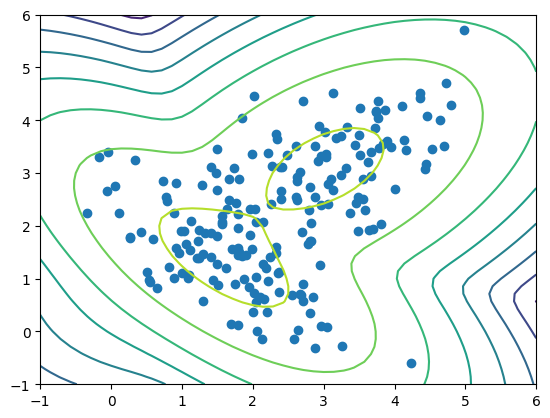

In [10]:
X, Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(50,50)

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [ ]:
# 자기조직화지도
# https://ratsgo.github.io/machine%20learning/2017/05/01/SOM/

# 초기화 - 경쟁 - 협력 - 적응의 과정

In [11]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=62f4d20688615fc847f6adad3eb7028780351232c1b4919faac94830d1703933
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built MiniSom


In [12]:
# 라이브러리 호출 및 데이터셋 내려받기
import numpy as np
from sklearn.datasets import load_digits      # 숫자 이미지
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()
data = digits.data        # 데이터
labels = digits.target    # 레이블

SOM 초기화

. SOM 진행 종료


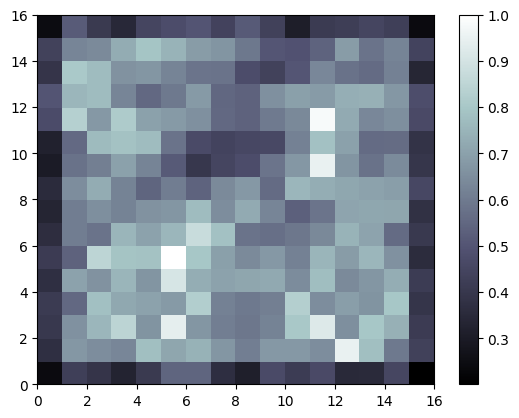

In [14]:
# 훈련 데이터셋을 MiniSom 알고리즘에 적용
som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data) # 가중치 초기화   *데이터 초기화하는 것 X
print("SOM 초기화")
som.train_random(data, 10000)
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T)
colorbar()

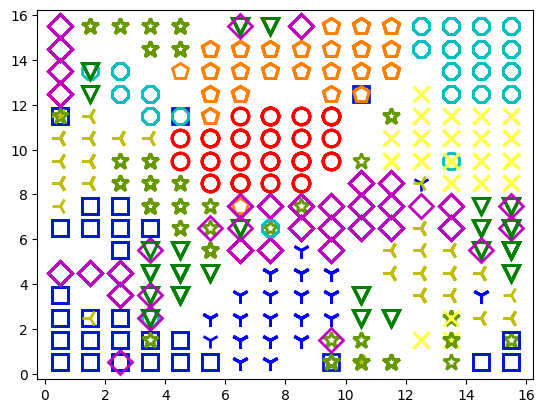

In [15]:
# 클래스(숫자)에 대해 레이블 설정 및 색상 할당
labels[labels=='0'] = 0
labels[labels=='1'] = 1
labels[labels=='2'] = 2
labels[labels=='3'] = 3
labels[labels=='4'] = 4
labels[labels=='5'] = 5
labels[labels=='6'] = 6
labels[labels=='7'] = 7
labels[labels=='8'] = 8
labels[labels=='9'] = 9

markers = ['o','v','1','3','8','s','p','x','D','*']     # 레이블에 대한 마커
colors = ['r','g','b','y','c',(0,0.1,0.8), (1,0.5,0), (1,1,0.3),'m',(0.4,0.6,0)]
for cnt, xx in enumerate(data):     # 시각화 처리
  w = som.winner(xx)      # 승자(우승 노드) 식별
  plot(w[0]+.5, w[1]+.5, markers[labels[cnt]],
       markerfacecolor='None', markeredgecolor=colors[labels[cnt]],
       markersize=12, markeredgewidth=2)
show()